In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
plt.style.use("fivethirtyeight")

/home/miles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/miles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/miles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/miles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/miles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
data = load_iris()

In [3]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [4]:
df = pd.DataFrame(data['data'], columns=columns)
df['type'] = data['target']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
lr_model = LogisticRegression(multi_class="multinomial", solver="saga", max_iter=2048).fit(df[columns], df['type'])

In [6]:
pca = PCA(n_components=2).fit(df[columns])
X_pca = pca.transform(df[columns])

In [7]:
df['predicted'] = lr_model.predict(df[columns])
trues = pca.transform(df[df['predicted'] == df['type']][columns])
falses = pca.transform(df[df['predicted'] != df['type']][columns])

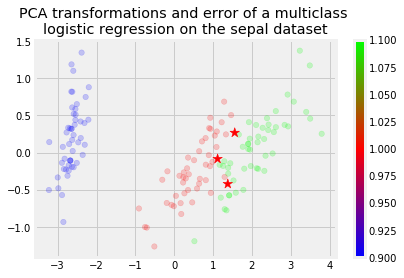

In [18]:
plt.scatter(trues[:, 0], trues[:, 1], alpha=0.2, c=df[df['predicted'] == df['type']]['type'], cmap="brg", s=30)
plt.scatter(falses[:, 0], falses[:, 1], marker="*", c=df[df['predicted'] != df['type']]['type'], cmap="brg", s=100)
plt.colorbar()
plt.title("PCA transformations and error of a multiclass \nlogistic regression on the sepal dataset")
plt.show()